<a href="https://colab.research.google.com/github/ChiragDate/IS/blob/main/OwnCipher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
prime_list=[3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97,101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199]
multi_inv_list=[171, 205, 183, 163, 197, 241, 27, 167, 53, 223, 173, 25, 131, 207, 29, 243, 21, 107, 119, 249, 175, 219, 233, 161, 109, 87, 67, 101, 145, 127, 43, 185, 35, 189, 39, 181, 11, 23, 37, 123, 157, 63, 65, 13, 247]
char_list=['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [ ]:
import random
def gen_random_key():
  key=""
  l = len(char_list)
  for i in range(64):
      index = random.randint(0,l-1)
      key+=char_list[index]
    
  return key


In [ ]:
key = gen_random_key()
print("key==>",key)

key==> G829MHI4X36C5P19QJORY62VQJ0EPSBC77ZNZK4M05DI98UTMQ90C465VFLB5SJY


In [ ]:
def getMultipleInverse(key, limit):
  i = 1
  while (i <= 1000):
    a = ((limit * i) + 1) % key
    if a == 0:
      return ((limit * i) + 1)//key
    i += 1
  return -1

In [ ]:
p4 = [1, 3, 2, 0]
p4_inv = [3, 0, 2, 1]

def get_p4(input_value):
    res = []
    if len(input_value) == 4:
        for i in range(4):
            res.append(input_value[p4[i]])
    return res

def get_p4_inv(input_value):
    res = []
    if len(input_value) == 4:
        for i in range(4):
            res.append(input_value[p4_inv[i]])
    return res

In [ ]:
def OwnFunctionEncrypt(input_value, key):
    result = input_value
    if len(key) == 8 and len(input_value) == 8:
        key1, key2 = key[0:4], key[4:8]
        input1, input2 = input_value[0:4], input_value[4:8]
        for i in range(4):
            k1 = char_list.index(key1[i])
            add_cipher = (input1[i] + k1) % 256
            input1[i]=add_cipher
        # print(input1)
        input1 = get_p4(input1)
        for i in range(4):
            k2_index = char_list.index(key2[i])
            k2 = prime_list[k2_index]
            mul_cipher = (input2[i] * k2) % 256
            input2[i] = mul_cipher
        input2 = get_p4(input2)
        result = input2+input1
    return result

In [ ]:
def OwnFunctionDecrypt(input_value, key):
    result = input_value
    if len(key) == 8 and len(input_value) == 8:
        key1, key2 = key[0:4], key[4:8]
        input2, input1 = input_value[0:4], input_value[4:8]
        input2 = get_p4_inv(input2)
        for i in range(4):
            k2_index = char_list.index(key2[i])
            k2 = multi_inv_list[k2_index]
            # mulInv = getMultipleInverse(k2,256)
            de_mul_cipher = (input2[i] * k2) % 256
            input2[i]=de_mul_cipher
        
        input1 = get_p4_inv(input1)
        # print(result)
        for i in range(4):
            k1 = char_list.index(key1[i])
            de_add_cipher = (input1[i] - k1) % 256
            input1[i] = de_add_cipher
        
        result=input1+input2
    return result

In [ ]:
def left_shift(value):
    result = []
    l = len(value)
    for i in range(l):
        result.append((value[(i+1)%l]))
    return result

def right_shift(value):
    result = []
    l = len(value)
    for i in range(l):
        index = i-1
        if i<0:
            i+=l
        result.append((value[index]))
    return result

def left_shift_key(value):
    result = ""
    l = len(value)
    for i in range(l):
        result += (value[(i + 1) % l])
    return result
  
def isDoubleShiftKey(n):
    return n==2 or n==5 or n==9 or n==13

In [ ]:
def create_key_list(key_value):
    keyList=[]
    for i in range(16):
        if isDoubleShiftKey(i+1):
            key_value = left_shift_key(key_value)
            key_value = left_shift_key(key_value)
        else:
            key_value = left_shift_key(key_value)
        key_set=[]
        for j in range(8):
            key_item = key_value[j*8:j*8+8]
            key_set.append(key_item)
        keyList.append(key_set)
    return keyList

In [ ]:
def encryption(input_value, key_value):
    keyList = create_key_list(key_value)
    result = []
    input_blocks = []
    for i in range(8):
        sub_block = input_value[8*i:8*i+8]
        input_blocks.append(sub_block)
    # print(input_blocks)
    for i in range(16):
        for j in range(8):
            input_blocks[j]=OwnFunctionEncrypt(input_blocks[j], keyList[i][j])
        if i < 15:
            input_blocks = left_shift(input_blocks)
        # print(input_blocks)
    for i in range(8):
        for j in range(8):
            result.append(input_blocks[i][j])
    return result

In [ ]:
def decryption(input_value, key_value):
    keyList = create_key_list(key_value)
    result = []
    input_blocks = []
    for i in range(8):
        sub_block = input_value[8*i:8*i+8]
        input_blocks.append(sub_block)
    # print(input_blocks)
    for i in range(16):
        key_list_index = 15 - i
        for j in range(8):
            input_blocks[j]=OwnFunctionDecrypt(input_blocks[j], keyList[key_list_index][j])
        if i < 15:
            input_blocks = right_shift(input_blocks)
        # print(input_blocks)
    for i in range(8):
        for j in range(8):
            result.append(input_blocks[i][j])
    return result

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%cd /content

/content


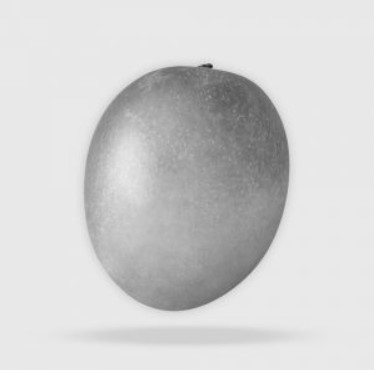

In [ ]:
img_cv = cv2.imread("/content/sample_data/mango'.jpg",0)
cv2_imshow(img_cv)

In [ ]:
r,c = img_cv.shape
print(r,c)

370 376


In [ ]:
def divideImageToBlocks(img_cv,r,c):
  # img 2d matrix to 1d matrix
  img_1d = []
  for i in range(r):
    for j in range(c):
      img_1d.append(img_cv[i][j])
  n = r*c
  if n%64!=0:
    n = (n//64)+1
  else:
    n=n//64
  extra_pixel = n*64-(r*c)
  for i in range(extra_pixel):
    img_1d.append(0)

  # divide img1d into blocks of 64 pixel
  input_blocks=[]
  for i in range(n):
    sub_block = img_1d[64*i:64*i+64]
    input_blocks.append(sub_block)
  extra_blocks=0
  if n%8!=0:
    extra_blocks = ((n//8)+1)*8 - n 
  for i in range(extra_blocks):
    sub_block=[]
    for i in range(64):
      sub_block.append(0)
    input_blocks.append(sub_block)
  return input_blocks


In [ ]:
def blocksToImg(blocks,r,c):
  img_1d=[]
  for i in range(len(blocks)):
    for j in range(64):
      img_1d.append(blocks[i][j])
  # print(img_1d)
  img_array = np.zeros(shape=(r,c),dtype=np.uint8)
  for i in range(r):
    for j in range(c):
      img_1d_index = c*i+j
      img_array[i][j]=img_1d[img_1d_index]
  return img_array

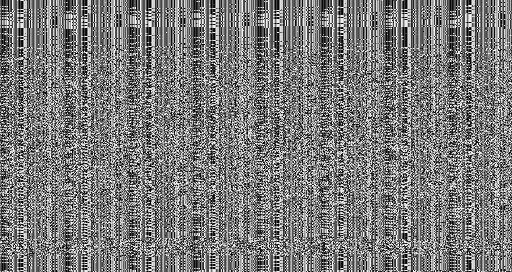

In [ ]:
input_blocks = divideImageToBlocks(img_cv,r,c)
encrypted_blocks = divideImageToBlocks(img_cv,r,c)
# print(len(input_blocks)/8)
for i in range(len(input_blocks)):
  # print(len(input_blocks[i]))
  encrypted_blocks[i]=encryption(input_blocks[i],key)
encypted_array = blocksToImg(encrypted_blocks,len(encrypted_blocks)//8,512)
cv2.imwrite("sample_data/encrypted_IS_OWN.jpg",encypted_array)
cv2_imshow(encypted_array)


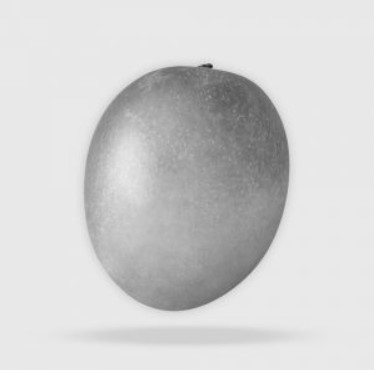

In [ ]:
encypted_read_array = cv2.imread('sample_data/encrypted_IS_OWN.jpg',cv2.IMREAD_GRAYSCALE)
encrypt_blocks = divideImageToBlocks(encypted_array,len(encrypted_blocks)//8,512)
decrypt_blocks = divideImageToBlocks(encypted_array,len(encrypted_blocks)//8,512)
for i in range(len(encrypt_blocks)):
  decrypt_blocks[i]=decryption(encrypt_blocks[i],key)
decypted_array = blocksToImg(decrypt_blocks,r,c)
cv2_imshow(decypted_array)